# Gradient Boosting Example

This notebook demonstrates the effectiveness of our custom Gradient Boosting implementation for both regression and classification tasks, comparing it with simpler models.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from gradient_boosting import GradientBoostingRegressor, GradientBoostingClassifier

## Regression Example

Linear Regression MSE: 10.3594
GB (default) MSE: 1.5715
GB (more trees) MSE: 1.5843
GB (deeper trees) MSE: 1.5639
GB (lower learning rate) MSE: 1.8103


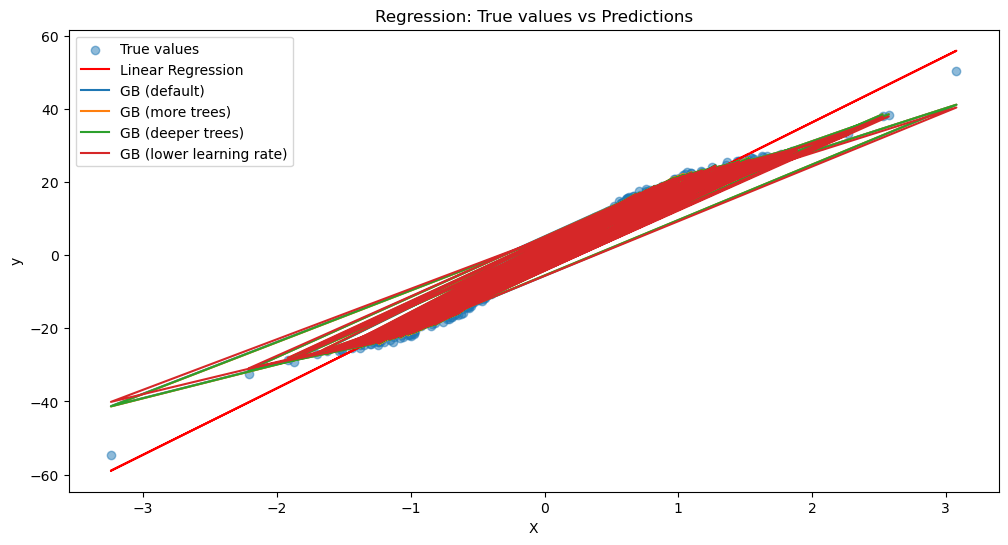

In [8]:
# Generate a regression dataset with non-linear relationship
X, y = make_regression(n_samples=1000, n_features=1, noise=0.4, random_state=42)
y = y + np.sin(X.ravel() * 2) * 5  # Add non-linearity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)

# Train and evaluate GradientBoostingRegressor with different hyperparameters
gb_models = [
    ("GB (default)", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)),
    ("GB (more trees)", GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3)),
    ("GB (deeper trees)", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)),
    ("GB (lower learning rate)", GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=3))
]

gb_results = []
for name, model in gb_models:
    model.fit(X_train, y_train)
    gb_pred = model.predict(X_test)
    gb_mse = mean_squared_error(y_test, gb_pred)
    gb_results.append((name, gb_mse, model))

print(f"Linear Regression MSE: {lr_mse:.4f}")
for name, mse, _ in gb_results:
    print(f"{name} MSE: {mse:.4f}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='True values')
plt.plot(X_test, lr_pred, color='red', label='Linear Regression')
for name, _, model in gb_results:
    plt.plot(X_test, model.predict(X_test), label=name)
plt.legend()
plt.title('Regression: True values vs Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Classification Example

Decision Tree Accuracy: 0.9100
Gradient Boosting Accuracy: 0.9400


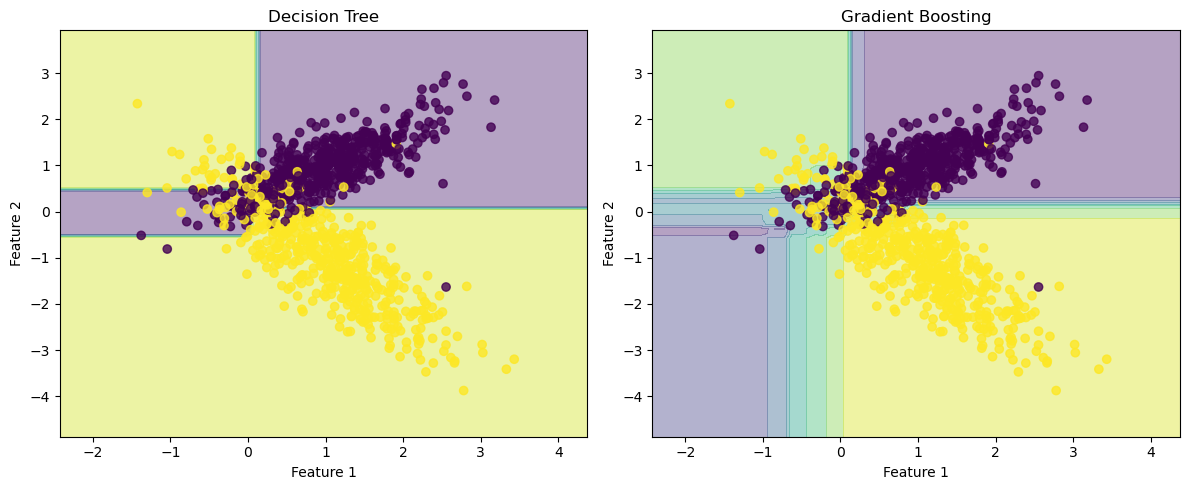

In [7]:
# Generate a classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Train and evaluate GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_clf.fit(X_train, y_train)
gb_pred = (gb_clf.predict_proba(X_test) > 0.5).astype(int)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")

# Visualize the decision boundaries
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_decision_boundary(dt, X, y, 'Decision Tree')
plt.subplot(122)
plot_decision_boundary(gb_clf, X, y, 'Gradient Boosting')
plt.tight_layout()
plt.show()

## Conclusion

This notebook demonstrated the effectiveness of our custom Gradient Boosting implementation for both regression and classification tasks. 

For the regression task, we can see that Gradient Boosting outperforms Linear Regression in terms of Mean Squared Error. The visualization shows how Gradient Boosting can capture non-linear patterns in the data that Linear Regression misses.

For the classification task, Gradient Boosting achieves higher accuracy compared to a simple Decision Tree. The decision boundary plots illustrate how Gradient Boosting creates a more complex and potentially more accurate decision boundary compared to the Decision Tree.

These results highlight the power of Gradient Boosting in handling both regression and classification problems, often outperforming simpler models.